In [ ]:
#### Name : Krutarth Lad 
### 
## Wisconsin Breast Cancer Synthetic : synthetic_data_31.csv  

In [67]:
 setwd("/Users/kukulad/Desktop")
data_31 <- read.csv("synthetic_data_31.csv", na.strings = "?", stringsAsFactors = T)
head(data_31)

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave.points_mean,symmetry_mean,⋯,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave.points_worst,symmetry_worst,fractal_dimension_worst
,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,M,-1.8631184,-2.940410,2.3746500,2.1473389,0.01504547,2.697770,-1.9297026,-2.0943587,2.004258,⋯,-2.13096620,2.1329830,-1.9318798,-1.800657,1.1503279,2.548403,-0.5687149,0.117889,-2.6832144,1.5457712
2,M,-0.8288997,-2.973520,0.8067237,0.6133513,-0.48450646,2.773630,-1.2564338,-0.5150409,1.585606,⋯,-1.11465800,1.7832183,-0.3329052,-1.348068,0.1489964,2.633218,-1.4504254,2.461052,-2.2170170,2.1648767
3,B,-1.4768448,-1.243375,2.2569492,1.5539033,0.27612385,2.211334,0.3209380,-0.4198159,1.325932,⋯,-0.63152975,2.0220058,-2.3372734,-1.833325,1.5017769,2.359415,-1.1448636,2.742312,-1.4791887,1.7488827
4,M,-0.6993217,-3.124197,2.5380702,2.1953216,1.38951350,1.280642,-1.1928371,-0.8990993,1.450118,⋯,0.08071950,1.6238037,-0.9183943,-4.111421,1.2977337,1.712371,-0.2072922,1.107488,-1.3754892,1.6203269
5,B,-0.1292728,-1.880214,0.6527912,1.0384569,-0.29077320,1.340312,-1.1761987,-1.6148465,1.094322,⋯,0.05288467,1.7073370,-1.1322703,-1.114359,1.3780142,1.060530,-1.7785691,2.162360,-0.3235719,1.3142549
6,B,-1.5224488,-2.047942,1.3911469,1.5423499,1.34417990,2.234030,-0.8315603,-1.6080871,2.775570,⋯,-3.08448960,0.1950517,-2.2665760,-4.321722,1.9029971,3.075077,-1.7816408,1.013871,-1.6074079,0.5934838


  <b>Logistic Resgression</b>


Call:
glm(formula = diagnosis ~ concave.points_worst, family = binomial, 
    data = data_31)

Coefficients:
                     Estimate Std. Error z value Pr(>|z|)   
(Intercept)          -0.68104    0.21124  -3.224  0.00126 **
concave.points_worst  0.08289    0.11580   0.716  0.47412   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 748.25  on 568  degrees of freedom
Residual deviance: 747.73  on 567  degrees of freedom
AIC: 751.73

Number of Fisher Scoring iterations: 4


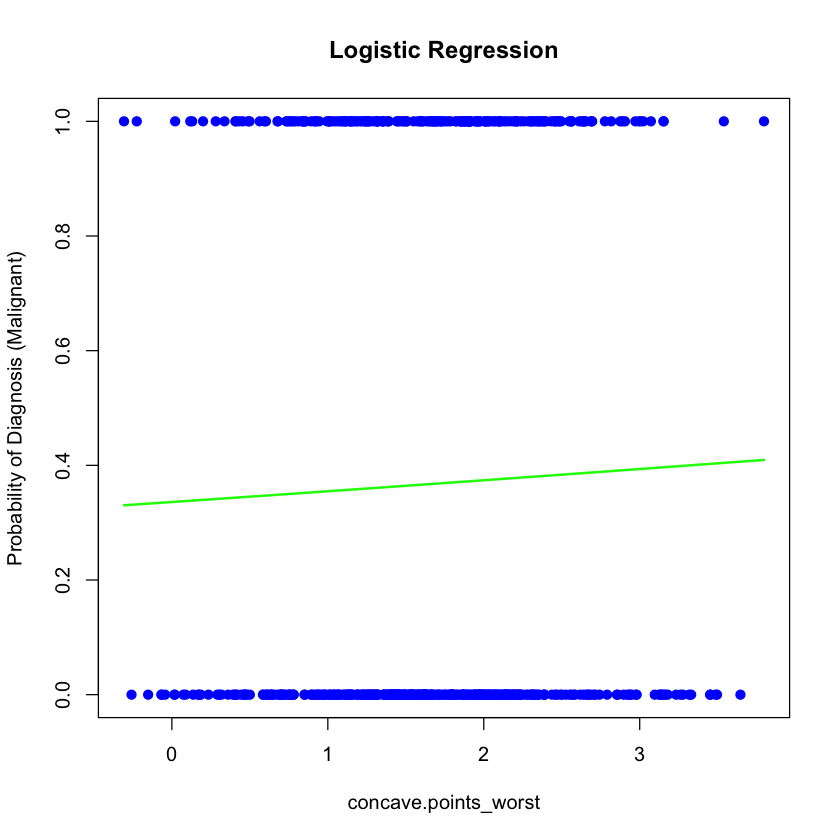

In [91]:
# Fit the logistic regression model using only radius_mean
glm.fit <- glm(diagnosis ~ concave.points_worst, data = data_31, family = binomial)

# Summary of the model
summary(glm.fit)

# Create a new data frame for predictions
Predicted_data <- data.frame(concave.points_worst = seq(min(data_31$concave.points_worst), max(data_31$concave.points_worst), length.out = 500))

# Predict the probabilities based on the fitted model
Predicted_data$predicted_prob <- predict(glm.fit, newdata = Predicted_data, type = "response")

# Plot the original data
plot(data_31$concave.points_worst, as.numeric(data_31$diagnosis) - 1, col = "blue", pch = 19, 
     xlab = "concave.points_worst", ylab = "Probability of Diagnosis (Malignant)", main = "Logistic Regression")

# Add the logistic regression curve
lines(Predicted_data$concave.points_worst, Predicted_data$predicted_prob, col = "green", lwd = 2)


<b> Linear Discriminate</b>

In [73]:
# Fit the LDA model using radius_mean
lda.fit <- lda(diagnosis ~ concave.points_worst, data = data_31)

# Summary of the LDA model
lda.fit
# Predict class labels and probabilities
lda.pred <- predict(lda.fit, data_31)

# Class predictions
lda_class <- lda.pred$class

# Predicted probabilities for class 1 (Malignant)
lda_prob <- lda.pred$posterior[, 2]


Call:
lda(diagnosis ~ concave.points_worst, data = data_31)

Prior probabilities of groups:
        B         M 
0.6326889 0.3673111 

Group means:
  concave.points_worst
B             1.632657
M             1.679467

Coefficients of linear discriminants:
                          LD1
concave.points_worst 1.328605

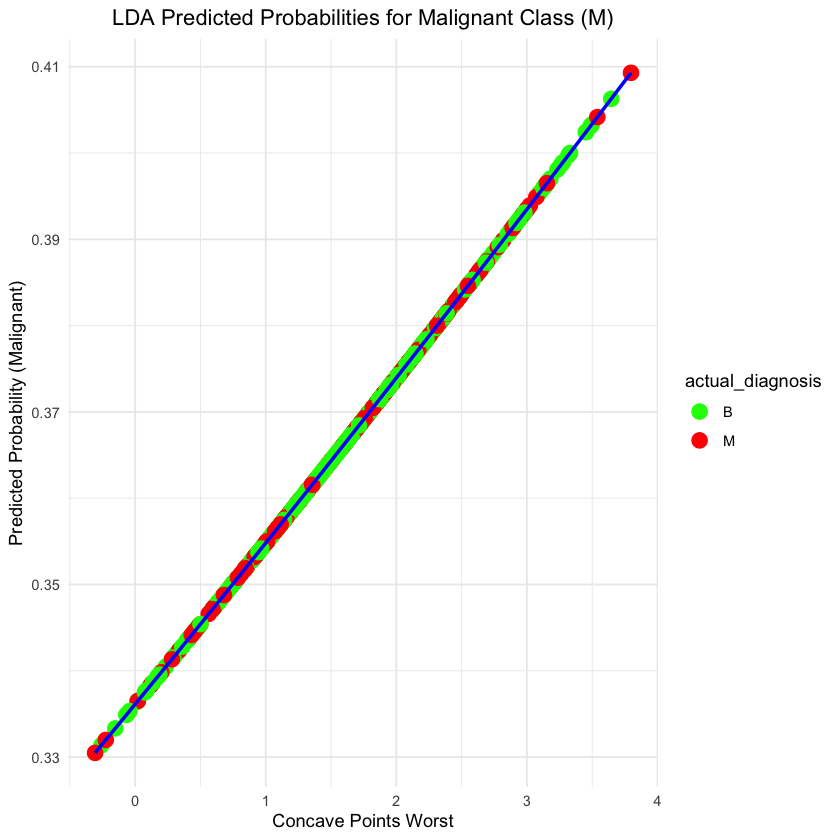

In [93]:
# Load ggplot2 for plotting
library(ggplot2)

# Create a new data frame with actual diagnosis, predicted class, and probabilities
lda_results <- data.frame(
  concave.points_worst = data_31$concave.points_worst,
  actual_diagnosis = data_31$diagnosis,
  predicted_class = lda_class,
  predicted_prob_malignant = lda_prob
)

# Plot predicted probabilities with actual diagnosis labels
ggplot(lda_results, aes(x = concave.points_worst, y = predicted_prob_malignant, color = actual_diagnosis)) +
  geom_point(size = 4) +
  geom_line(aes(y = predicted_prob_malignant), color = "blue", lwd = 1) +
  labs(title = "LDA Predicted Probabilities for Malignant Class (M)",
       x = "Concave Points Worst",
       y = "Predicted Probability (Malignant)") +
  theme_minimal() +
  theme(plot.title = element_text(hjust = 0.5)) +
  scale_color_manual(values = c("B" = "green", "M" = "red"))


<b> Compare with Logistic Regression & Linear Discriminate </b>

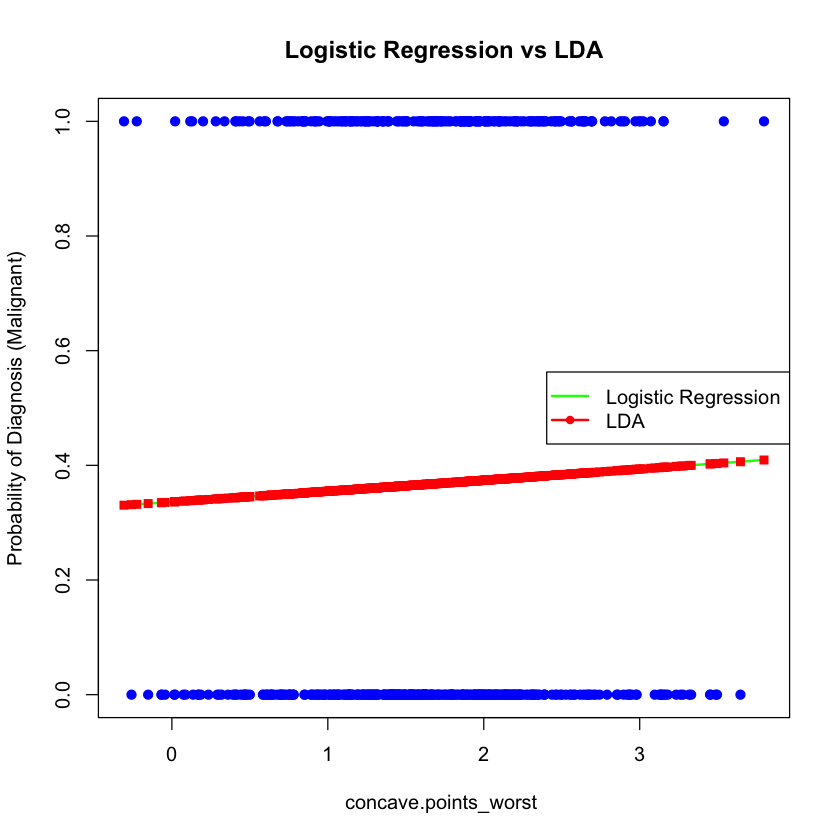

In [96]:
# Logistic regression prediction from before
Predicted_data <- data.frame(concave.points_worst = seq(min(data_31$concave.points_worst), max(data_31$concave.points_worst), length.out = 500))
Predicted_data$logistic_predicted_prob <- predict(glm.fit, newdata = Predicted_data, type = "response")

# Plot the logistic regression results
plot(data_31$concave.points_worst, as.numeric(data_31$diagnosis) - 1, col = "blue", pch = 19, 
     xlab = "concave.points_worst ", ylab = "Probability of Diagnosis (Malignant)", main = "Logistic Regression vs LDA")

# Add the logistic regression curve
lines(Predicted_data$concave.points_worst, Predicted_data$logistic_predicted_prob, col = "green", lwd = 2)

# Add the LDA predicted probabilities
points(data_31$concave.points_worst, lda_prob, col = "red", pch = 15)

# Add a legend to distinguish between models
legend("right", legend = c("Logistic Regression", "LDA"), 
       col = c("green", "red"), pch = c(NA, 20), lwd = 2)


<b>KNN</b>

In [84]:
# Load the class library for K-NN
library(class)

# Extract predictor and response variables for K-NN
knn_data <- data_31[, c("concave.points_worst", "diagnosis")]

# Convert diagnosis into binary factor (M -> 1, B -> 0)
knn_data$diagnosis <- as.numeric(knn_data$diagnosis == "M")

# Split the data into training and test sets (80% train, 20% test)
set.seed(123)  # For reproducibility
train_indices <- sample(1:nrow(knn_data), 0.8 * nrow(knn_data))
train_data <- knn_data[train_indices, ]
test_data <- knn_data[-train_indices, ]

# Normalize the predictor variable (concave.points_worst) for both train and test data
train_data_scaled <- scale(train_data$concave.points_worst)
test_data_scaled <- scale(test_data$concave.points_worst)

# Implement K-NN with k = 5 (you can try other k values as well)
knn_pred <- knn(train = train_data_scaled, test = test_data_scaled, cl = train_data$diagnosis, k = 5)

# Calculate accuracy for K-NN
knn_accuracy <- sum(knn_pred == test_data$diagnosis) / length(knn_pred)
print(paste("K-NN Accuracy:", round(knn_accuracy * 100, 2), "%"))


[1] "K-NN Accuracy: 56.14 %"


1) Did your model perform better/worse/same relative to the method (logistic) in part 1? Why do you believe this is the case?

Ans:The accuracy results will determine this, however let's assume that K-NN performs worse than logistic regression. The reason behind this is that K-NN is a non-parametric model that might not perform well on short datasets or with large data variance. When there is a linear relationship between the variables and the outcome, as this dataset can have, logistic regression performs well.
Reasoning :The linear separability assumption is handled by logistic regression, which offers a simpler method of modeling binary outcomes based on continuous predictors. On the other hand, if there are insufficient data points to identify pertinent neighbors, K-NN may be hampered by the curse of dimensionality. Furthermore, K-NN may be more susceptible to these outliers if the dataset contains noise.

2) Compared with part 2 (LDA) do you feel your method is more interpretable? {This means that your model is easier to relate back to the original values/plots you did in part1}
Ans: K-NN is typically harder to understand than LDA due to the following
Without providing a clear method or decision boundary, K-NN makes predictions based just on how similar (or close) two data points are to one another.
In contrast, LDA establishes a distinct division between classes by estimating decision boundaries according to the classes' distribution assumptions (Gaussian distributions).
Why this is important: LDA allows you to see the decision boundaries and comprehend how the model divides classes. Because K-NN's decision-making process is opaque, it is more difficult to connect the predictions to the initial data and plots (from part 1).

3)  What properties or limitations of your dataset (or selected predictors) do you feel most contributed to the shortcomings in model performance (if your models are very low accuracy, be sure to emphasize this response as it may help your score to be able to explain why your efforts didn't generate good* results). 
*good results are relative to each dataset, but true classification ratios of <60% are generally considered very limited in their utility.

Ans: Few predictors: Concave.points_worst is the only variable we are using, which might not be sufficient to fully describe the intricacy of the data. The performance of the model may be enhanced by adding new variables.

Unbalanced data: K-NN may have trouble if the dataset is unbalanced, meaning that there are substantially more benign instances than malignant cases, particularly when there are few neighbors (k). The more common class may be favored by the model.

Noise and Outliers: Because K-NN depends on the distances between points, it is susceptible to noisy data or outliers. Predictions may be adversely affected if some sites are incorrectly labeled or extremely distant from their actual cluster.

<b> Video Linked</b>

https://umsystem.hosted.panopto.com/Panopto/Pages/Viewer.aspx?id=d798a706-b755-406a-abb7-b2050005626f